<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever o peso do penguin (**body_mass_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [20]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
penguim = sns.load_dataset('penguins')

In [4]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos por sexo:

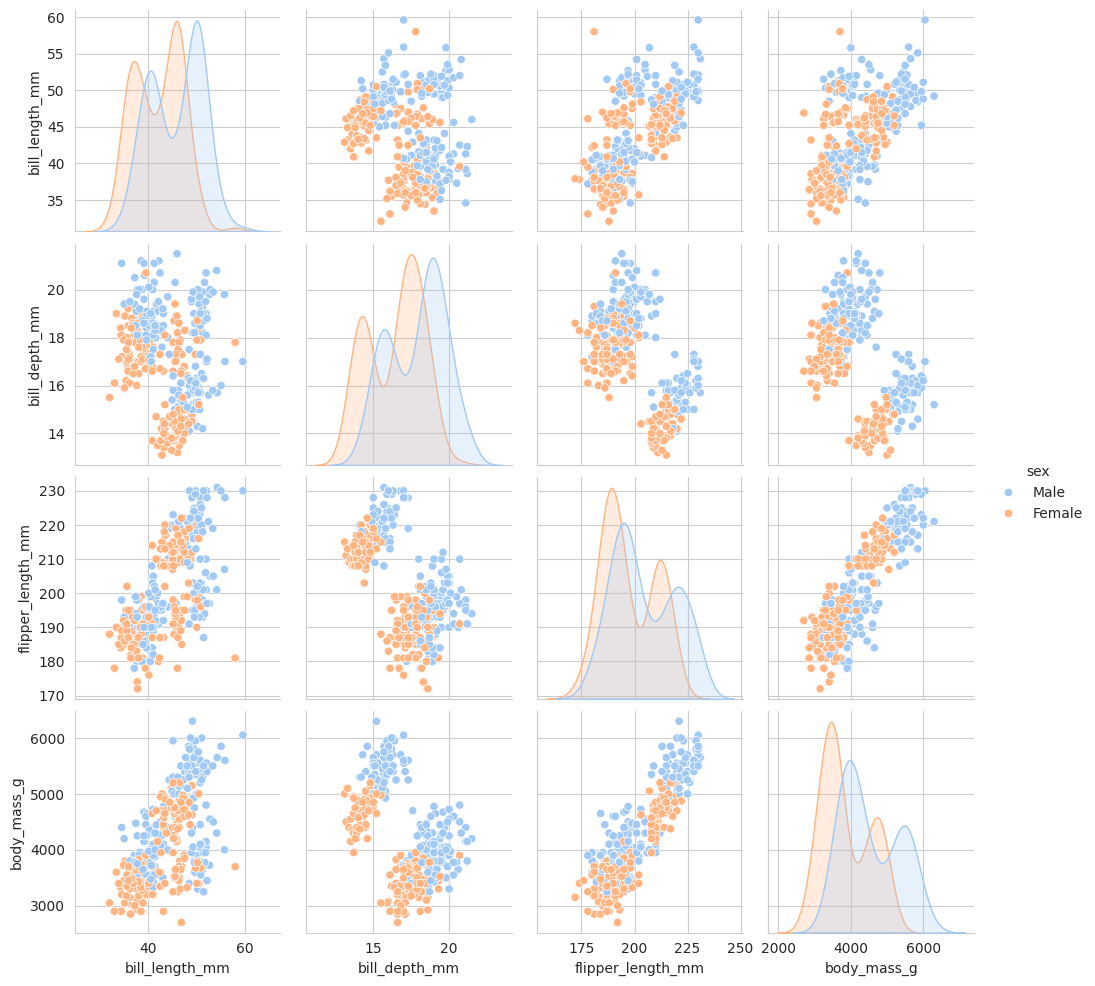

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue='sex', palette='pastel')

**Comentário:**

- Bill length → Comprimento do bico
- Bill depth → Profundidade do bico
- Flipper length → Comprimento da nadadeira
- Body mass → Massa corporal

O gráfico apresenta a distribuição dos atributos numéricos acima, segmentados por sexo.

- Os machos tendem a ser maiores que as fêmeas em comprimento do bico, nadadeira e massa corporal;
- A massa corporal dos machos também é geralmente maior que a das fêmeas;
- A profundidade do bico apresenta distribuição semelhante entre os sexos;
- Considerando todo o contexto, os machos possuem valores ligeiramente maiores;
- Algumas áreas dos gráficos mostram uma sobreposição significativa, sugerindo que certos atributos sozinhos podem não ser suficientes para distinguir completamente os sexos;


 - Atributos por espécie:

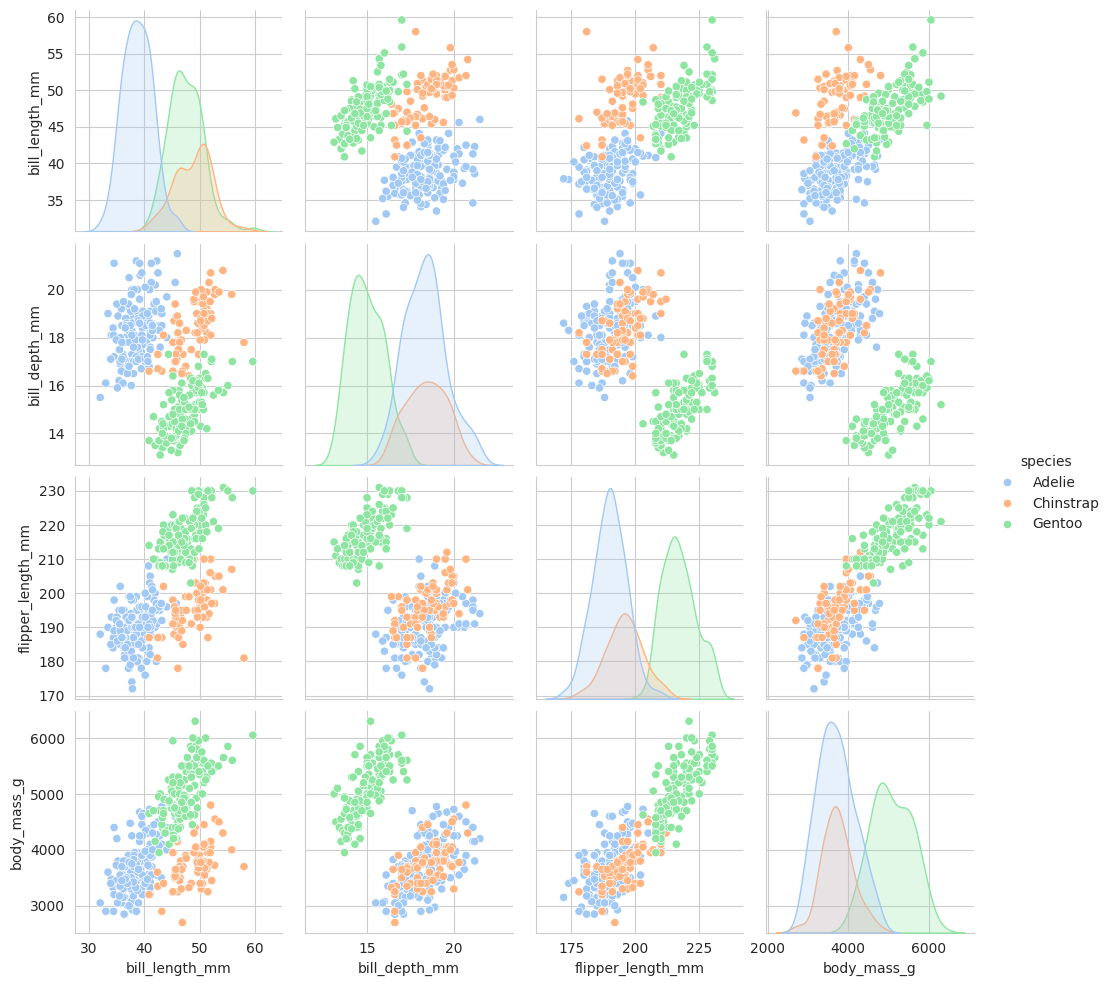

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue='species', palette='pastel')

**Comentário:**

O gráfico apresenta a distribuição dos atributos numéricos acima, segmentados por espécie.

- Gentoo (verde) apresenta os maiores valores médios de massa corporal e comprimento da nadadeira;
- Chinstrap (laranja) tem bicos mais longos e finos;
- Adélie (azul) possui bicos mais curtos e profundos.
- A separação entre as espécies é bem definida, especialmente para Gentoo, que possui características bem distintas.
- Adélie e Chinstrap têm certa sobreposição em alguns atributos, mas o formato do bico pode ser um bom indicativo para diferenciá-los.
- O gráfico mostra que as espécies de pinguins podem ser classificadas com boa precisão usando essas variáveis.

 - Atributos por ilha:

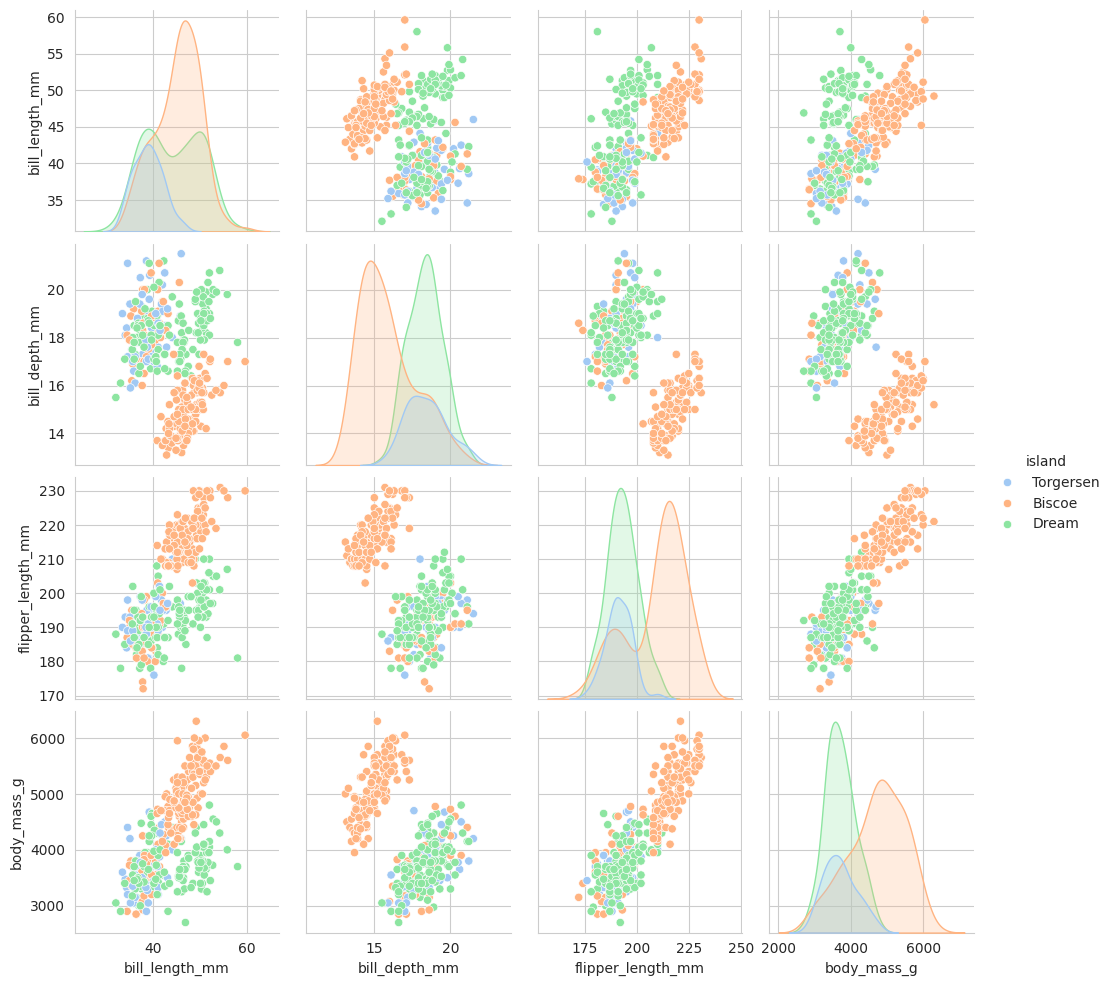

In [7]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue='island', palette='pastel')

**Comentário:**

O gráfico apresenta a distribuição dos atributos numéricos acima, segmentados por ilha.

- Biscoe (laranja): Pinguins maiores e nadadeiras longas,podendo ser Gentoo a espécie predominante por ser maior;
- Dream (verde): Pinguins intermediários;
- Torgersen (azul): Pinguins menores e bicos menores, podendo ser Adélie a espécie predominante por ser menor;
- A localização geográfica pode ser um fator importante para diferenciar os pinguins, já que certas espécies habitam predominantemente determinadas ilhas.

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [8]:
# resposta da questão 2.1

# Verificando informações básicas do dataset
print(penguim.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [9]:
# Verificando valores faltantes
print(penguim.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [10]:
# Preencher colunas numéricas com a média
penguim.fillna(penguim.select_dtypes(include=['number']).mean(), inplace=True)

print(penguim.isnull().sum())

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64


### **2.2. Variáveis numéricas**

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [11]:
# resposta da questão 2.2

# Padronizar variáveis numéricas
numeric_cols = penguim.select_dtypes(include=['number']).columns
for col in numeric_cols:
    penguim[col + '_std'] = (penguim[col] - penguim[col].mean()) / penguim[col].std()

# Visualizar as primeiras linhas do dataset atualizado
print(penguim.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen        39.10000       18.70000         181.000000   
1  Adelie  Torgersen        39.50000       17.40000         186.000000   
2  Adelie  Torgersen        40.30000       18.00000         195.000000   
3  Adelie  Torgersen        43.92193       17.15117         200.915205   
4  Adelie  Torgersen        36.70000       19.30000         193.000000   

   body_mass_g     sex  bill_length_mm_std  bill_depth_mm_std  \
0  3750.000000    Male       -8.857909e-01       7.865967e-01   
1  3800.000000  Female       -8.123107e-01       1.263722e-01   
2  3250.000000  Female       -6.653503e-01       4.310912e-01   
3  4201.754386     NaN       -1.305271e-15       1.804299e-15   
4  3450.000000  Female       -1.326672e+00       1.091316e+00   

   flipper_length_mm_std  body_mass_g_std  
0              -1.420419        -0.564966  
1              -1.063802        -0.502436  
2              -0.421892        

### **2.3. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [12]:
# resposta da questão 2.3

# Identificar variáveis categóricas
categorical_cols = penguim.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['species', 'island', 'sex'], dtype='object')


In [13]:
penguim[['species', 'island', 'sex']].head()

,species,island,sex
0,Adelie,Torgersen,Male
1,Adelie,Torgersen,Female
2,Adelie,Torgersen,Female
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,Female


In [14]:
penguim['sex_m'] = penguim['sex'].apply(lambda sex: 1 if sex == 'Male' else (0 if pd.notna(sex) else None))
penguim['sex_f'] = penguim['sex'].apply(lambda sex: 1 if sex == 'Female' else (0 if pd.notna(sex) else None))

print(penguim)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen        39.10000       18.70000         181.000000   
1    Adelie  Torgersen        39.50000       17.40000         186.000000   
2    Adelie  Torgersen        40.30000       18.00000         195.000000   
3    Adelie  Torgersen        43.92193       17.15117         200.915205   
4    Adelie  Torgersen        36.70000       19.30000         193.000000   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe        43.92193       17.15117         200.915205   
340  Gentoo     Biscoe        46.80000       14.30000         215.000000   
341  Gentoo     Biscoe        50.40000       15.70000         222.000000   
342  Gentoo     Biscoe        45.20000       14.80000         212.000000   
343  Gentoo     Biscoe        49.90000       16.10000         213.000000   

     body_mass_g     sex  bill_length_mm_std  bill_depth_mm_std  \
0    3750.000000    

In [15]:
nominal_cols = ['species', 'island']
ordinal_cols = ['sex']

In [16]:
# Aplicar One-Hot Encoding para variáveis nominais
for col in nominal_cols:
  dummies = pd.get_dummies(penguim[col], prefix=col + '_nom', dummy_na=True)  # Inclui NaN como categoria
  penguim = pd.concat([penguim, dummies], axis=1)

# Visualizar as primeiras linhas
print(penguim.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen        39.10000       18.70000         181.000000   
1  Adelie  Torgersen        39.50000       17.40000         186.000000   
2  Adelie  Torgersen        40.30000       18.00000         195.000000   
3  Adelie  Torgersen        43.92193       17.15117         200.915205   
4  Adelie  Torgersen        36.70000       19.30000         193.000000   

   body_mass_g     sex  bill_length_mm_std  bill_depth_mm_std  \
0  3750.000000    Male       -8.857909e-01       7.865967e-01   
1  3800.000000  Female       -8.123107e-01       1.263722e-01   
2  3250.000000  Female       -6.653503e-01       4.310912e-01   
3  4201.754386     NaN       -1.305271e-15       1.804299e-15   
4  3450.000000  Female       -1.326672e+00       1.091316e+00   

   flipper_length_mm_std  ...  sex_m  sex_f  species_nom_Adelie  \
0              -1.420419  ...    1.0    0.0                True   
1              -1.063802  ... 

### **2.4. Limpeza**

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [23]:
# resposta da questão 2.4

# Identificar a variável resposta
response_col = 'species'

# Manter a coluna de resposta antes de remover as outras colunas categóricas
penguim_cleaned = penguim.drop(columns=['island', 'sex'])

# Garantir que a variável resposta seja a primeira coluna
cols = [response_col] + [col for col in penguim_cleaned.columns if col != response_col]
penguim_cleaned = penguim_cleaned[cols]

# Visualizar as primeiras linhas
print(penguim_cleaned.head())

  species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie        39.10000       18.70000         181.000000  3750.000000   
1  Adelie        39.50000       17.40000         186.000000  3800.000000   
2  Adelie        40.30000       18.00000         195.000000  3250.000000   
3  Adelie        43.92193       17.15117         200.915205  4201.754386   
4  Adelie        36.70000       19.30000         193.000000  3450.000000   

   bill_length_mm_std  bill_depth_mm_std  flipper_length_mm_std  \
0       -8.857909e-01       7.865967e-01              -1.420419   
1       -8.123107e-01       1.263722e-01              -1.063802   
2       -6.653503e-01       4.310912e-01              -0.421892   
3       -1.305271e-15       1.804299e-15               0.000000   
4       -1.326672e+00       1.091316e+00              -0.564539   

   body_mass_g_std  sex_m  sex_f  species_nom_Adelie  species_nom_Chinstrap  \
0        -0.564966    1.0    0.0                True         

### **2.5. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [28]:
# resposta da questão 2.5

# Separar a variável resposta (target) e as variáveis explicativas (features)
x = penguim_cleaned.drop(columns=['body_mass_g']) #Features(todas as colunas exceto o peso)
y = penguim_cleaned['body_mass_g'] #Target(peso)

# Separar em treino (2/3) e teste (1/3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=123)

# Visualizar o tamanho dos conjuntos
print(f'Tamanho do conjunto de treino: {x_train.shape[0]} amostras')
print(f'Tamanho do conjunto de teste: {x_test.shape[0]} amostras')

Tamanho do conjunto de treino: 229 amostras
Tamanho do conjunto de teste: 115 amostras


## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **regressão linear** com os **dados de treino** (2/3).

In [29]:
# resposta da questão 3.1

# Separar variáveis numéricas e categóricas
numeric_features = x.select_dtypes(include=['number']).columns
categorical_features = x.select_dtypes(include=['object']).columns

# Pré-processamento para variáveis numéricas (preencher valores faltantes com a média)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Pré-processamento para variáveis categóricas (preencher valores faltantes e aplicar one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Preencher NaNs com 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Aplicar one-hot encoding
])

# Combinar pré-processamento numérico e categórico
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicar o pré-processamento aos dados de treino
x_train_processed = preprocessor.fit_transform(x_train)

# Aplicar o pré-processamento aos dados de teste
x_test_processed = preprocessor.transform(x_test)

# Treinar o modelo de regressão linear
linear_model = LinearRegression()
linear_model.fit(x_train_processed, y_train)

# Fazer previsões no conjunto de teste
y_pred = linear_model.predict(x_test_processed)

### **3.2. Avaliação**

Calcule o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui um RMSE de approx. 296g, 7% da média do peso, uma performance razoável (seu RMSE pode não ser igual).

In [30]:
# resposta da questão 3.2

# Calcular o RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

# Calcular o RMSE como porcentagem da média do peso
mean_body_mass = penguim_cleaned['body_mass_g'].mean()
rmse_percentage = (rmse / mean_body_mass) * 100
print(f'RMSE como porcentagem da média do peso: {rmse_percentage:.2f}%')

RMSE: 0.00
RMSE como porcentagem da média do peso: 0.00%


## 4\. Predição  

### **4.1. Novo penguim**

Qual o peso de um penguim com as seguintes características:


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm | sex |
| --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2 e 2.3

> **Nota:** Como referência eu obtive um peso predito de 3786.16g (a sua predição pode não ser igual).

In [32]:
# resposta da questão 4.1 - NÃO ESTÁ DANDO CERTO

# Dados do pinguim
penguim_novo = pd.DataFrame({
    'species': ['Adelie'],
    'island': ['Biscoe'],
    'bill_length_mm': [38.2],
    'bill_depth_mm': [18.1],
    'flipper_length_mm': [185.0],
    'sex': ['Male']
})

# Adicionar colunas ausentes ao DataFrame penguim_novo
for col in x_train.columns:
    if col not in penguim_novo.columns:
        penguim_novo[col] = 0  #Preencher com 0 ou outro valor padrão

# Garantir que as colunas estejam na mesma ordem usada no treino
penguim_novo = penguim_novo[x_train.columns]

# Aplicar o mesmo pré-processamento aos novos dados
penguim_novo_processed = preprocessor.transform(penguim_novo)

# Fazer a previsão
peso_predito = linear_model.predict(penguim_novo_processed)
print(f'Peso predito: {peso_predito[0]:.2f}g')

Peso predito: 4201.75g


---